### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
### Keras and Tensorflow >2.0

In [2]:
### Data Collection
import pandas_datareader as pdr
key="4f8693e94e9fcd9263c87898897c7da04213bb4c"

In [3]:
# df = pdr.get_data_tiingo('AAPL', api_key=key)

In [4]:
# df.to_csv('AAPL.csv')

In [5]:
import pandas as pd

In [6]:
df=pd.read_csv('Tesla.csv')

In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [8]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2389,2019-12-24,418.359985,425.470001,412.690002,425.250000,425.250000,8054700
2390,2019-12-26,427.910004,433.480011,426.350006,430.940002,430.940002,10633900
2391,2019-12-27,435.000000,435.309998,426.109985,430.380005,430.380005,9945700
2392,2019-12-30,428.790009,429.000000,409.260010,414.700012,414.700012,12586400
2393,2019-12-31,405.000000,421.290009,402.079987,418.329987,418.329987,10285700


In [9]:
df1=df.reset_index()['Close']

In [10]:
df1

0        23.889999
1        23.830000
2        21.959999
3        19.200001
4        16.110001
           ...    
2389    425.250000
2390    430.940002
2391    430.380005
2392    414.700012
2393    418.329987
Name: Close, Length: 2394, dtype: float64

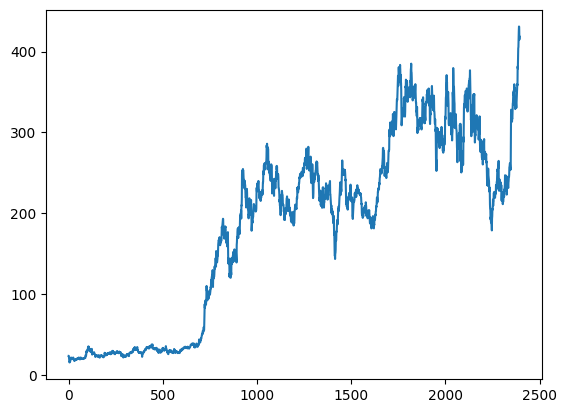

In [11]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [12]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [13]:
import numpy as np

In [14]:
df1

0        23.889999
1        23.830000
2        21.959999
3        19.200001
4        16.110001
           ...    
2389    425.250000
2390    430.940002
2391    430.380005
2392    414.700012
2393    418.329987
Name: Close, Length: 2394, dtype: float64

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [16]:
print(df1)

[[0.0194874 ]
 [0.01934287]
 [0.01483837]
 ...
 [0.99865106]
 [0.96088069]
 [0.96962467]]


In [17]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [18]:
training_size,test_size

(1556, 838)

In [19]:
train_data

array([[0.0194874 ],
       [0.01934287],
       [0.01483837],
       ...,
       [0.48031988],
       [0.47102181],
       [0.47263572]])

In [20]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [21]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [22]:
print(X_train.shape), print(y_train.shape)

(1455, 100)
(1455,)


(None, None)

In [23]:
print(X_test.shape), print(ytest.shape)

(737, 100)
(737,)


(None, None)

In [24]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [25]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [26]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
23/23 [==============================] - 13s 330ms/step - loss: 0.0191 - val_loss: 0.0065
Epoch 2/100
23/23 [==============================] - 6s 277ms/step - loss: 0.0019 - val_loss: 0.0072
Epoch 3/100
23/23 [==============================] - 6s 271ms/step - loss: 0.0011 - val_loss: 0.0040
Epoch 4/100
23/23 [==============================] - 6s 267ms/step - loss: 0.0010 - val_loss: 0.0052
Epoch 5/100
23/23 [==============================] - 6s 268ms/step - loss: 9.8036e-04 - val_loss: 0.0053
Epoch 6/100
23/23 [==============================] - 6s 256ms/step - loss: 9.2080e-04 - val_loss: 0.0044
Epoch 7/100
23/23 [==============================] - 6s 261ms/step - loss: 8.8480e-04 - val_loss: 0.0047
Epoch 8/100
23/23 [==============================] - 5s 234ms/step - loss: 8.4528e-04 - val_loss: 0.0042
Epoch 9/100
23/23 [==============================] - 7s 319ms/step - loss: 8.1983e-04 - val_loss: 0.0040
Epoch 10/100
23/23 [==============================] - 7s 320ms/step - 

In [30]:
import tensorflow as tf

In [31]:
tf.__version__

'2.12.0'

In [32]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

24/24 [==============================] - 2s 77ms/step


In [33]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [34]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

164.33140890612228

In [35]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

307.90976266798157

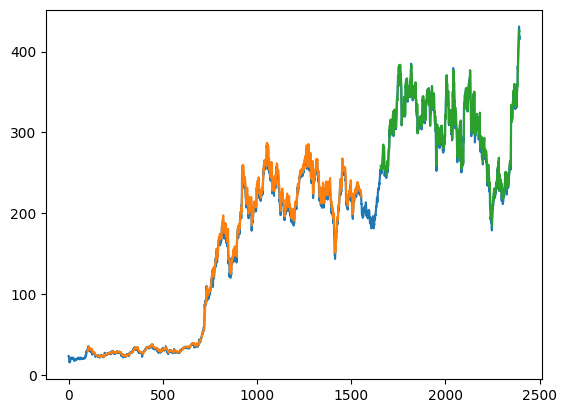

In [36]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [37]:
len(test_data)

838

In [38]:
x_input=test_data[(len(test_data)-100):].reshape(1,-1)
x_input.shape


(1, 100)

In [39]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [40]:
temp_input

[0.5280387193330505,
 0.5135857637732536,
 0.5280146431179138,
 0.4909668883221714,
 0.48137977076947647,
 0.49173772948047534,
 0.5083345401149756,
 0.5059979765573158,
 0.4938815845551786,
 0.49706121550772653,
 0.4711663367964237,
 0.47983812458525743,
 0.4776220095504071,
 0.4812593222466671,
 0.4960013634147451,
 0.5053957700756576,
 0.5039504600667223,
 0.49352023898675035,
 0.5149588114132158,
 0.5098280001453582,
 0.520282295031641,
 0.529315392256514,
 0.5571614512831264,
 0.5541985688962828,
 0.5525846603430907,
 0.5468275687872642,
 0.5515970320778676,
 0.5484655872791561,
 0.55595703831981,
 0.5415522327814606,
 0.5430216190055326,
 0.49961460230469434,
 0.5128390325536493,
 0.546225362305606,
 0.5451895840189355,
 0.5421544392631188,
 0.5513561711646376,
 0.5475984099455683,
 0.5232692536336212,
 0.5194151176980532,
 0.534566652047181,
 0.5401792212738873,
 0.5509707517898986,
 0.5514766196874471,
 0.5590644069033849,
 0.5809124387873371,
 0.583152704710928,
 0.58763308480

In [41]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.9645118]
101
1 day input [0.51358576 0.52801464 0.49096689 0.48137977 0.49173773 0.50833454
 0.50599798 0.49388158 0.49706122 0.47116634 0.47983812 0.47762201
 0.48125932 0.49600136 0.50539577 0.50395046 0.49352024 0.51495881
 0.509828   0.5202823  0.52931539 0.55716145 0.55419857 0.55258466
 0.54682757 0.55159703 0.54846559 0.55595704 0.54155223 0.54302162
 0.4996146  0.51283903 0.54622536 0.54518958 0.54215444 0.55135617
 0.54759841 0.52326925 0.51941512 0.53456665 0.54017922 0.55097075
 0.55147662 0.55906441 0.58091244 0.5831527  0.58763308 0.59298068
 0.5808884  0.57257792 0.57758829 0.57542032 0.68381749 0.75234861
 0.75133687 0.72365949 0.72074483 0.72052804 0.7166498  0.72667052
 0.72606831 0.74861489 0.77019802 0.77405216 0.79320228 0.80486099
 0.79565926 0.8034639  0.81025681 0.80500551 0.82796162 0.81037722
 0.81666422 0.76417596 0.77212505 0.75425161 0.75996051 0.75670858
 0.76858408 0.77178786 0.76415185 0.75774436 0.77104113 0.77980921
 0.80223538 0.81153348 0.82834704 

In [42]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [43]:
import matplotlib.pyplot as plt

In [44]:
len(df1)

2394

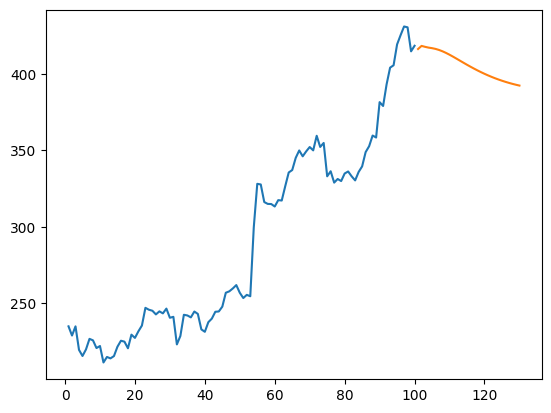

In [45]:
plt.plot(day_new,scaler.inverse_transform(df1[(len(df1)-100):]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

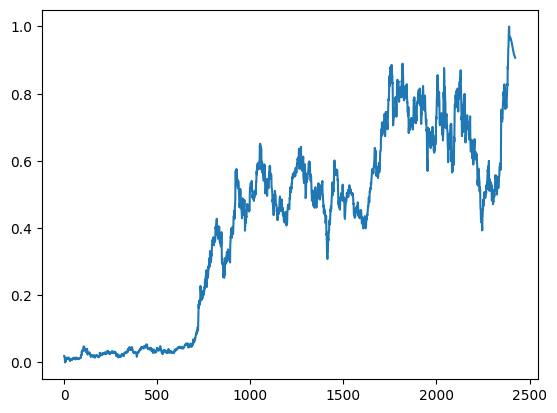

In [46]:
combined=df1.tolist()
combined.extend(lst_output)
plt.plot(combined[:])

In [47]:
combined=scaler.inverse_transform(combined).tolist()

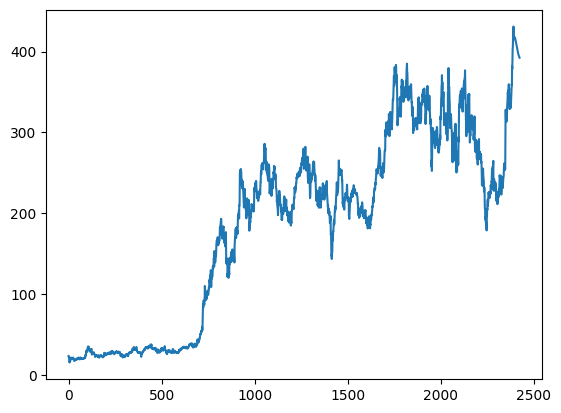

In [48]:
plt.plot(combined)